Request return 405 error!
{'message': '', 'status': 'fail'}
Request return 404 error!
Login success!

You login as: mariia_borodin
myFollowings
{'username': 'misha999777', 'id': 1069980525}
{'username': 'tatyana_mikhailovskaya__', 'id': 1533648282}
{'username': 'alyona.senko', 'id': 5523415048}
{'username': 'liiabulan', 'id': 39406239249}
{'username': 'art_k1ng', 'id': 3947641111}
{'username': 'alexandra.odokiienko', 'id': 25125482661}
{'username': 'alex.kredo', 'id': 7622597338}
{'username': 'alexey.vodka', 'id': 6845923505}
{'username': 'iana.sheiko', 'id': 7154453271}
{'username': 'isila05', 'id': 1723797361}
{'username': 'grlyosha', 'id': 1590716166}
{'username': 'chernihdmitry', 'id': 4272197771}
{'username': 'antuanella_adamkevych', 'id': 3232901469}
{'username': 'official_cmps', 'id': 5951176880}
{'username': 'zinchukliza', 'id': 3448527208}
{'username': 'semiaanna', 'id': 4261231873}
{'username': 'z.toma', 'id': 1432462261}
{'username': 'trovo_ya_ad', 'id': 14105114053}
{'usern

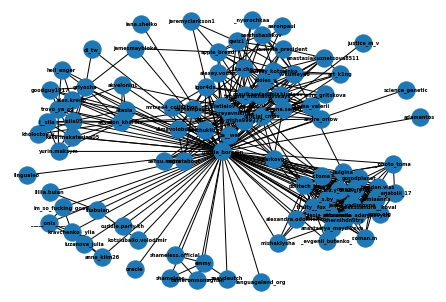

In [7]:
# Лабораторная работа №8
# Instagram

from InstagramAPI import InstagramAPI
from time import sleep
import networkx as nx
import matplotlib.pyplot as plt

api = InstagramAPI("mariia_borodin", "password")
myFollowings = []
myFollowingsNames = []

G = nx.Graph()

if api.login():
    print("You login as:", api.username)
    api.getSelfUserFeed()
    api.getUserFollowings(api.username_id)
    G.add_node(api.username, label=api.username)
    for following in api.LastJson['users']:
        myFollowingsNames.append(following['username'])
        myFollowings.append({"username": following["username"], "id": following["pk"]})

        G.add_node(following['username'], label=following['full_name'])
        G.add_edge(api.username, following['username'])
else:
    print("cannot to connect")

dictionary = {}
print("myFollowings")
i = 0
for person in myFollowings:
    print(person)
    listFollowers = []
    api.getUserFollowings(person['id'])
    for following in api.LastJson['users']:
        if following['username'] in myFollowingsNames:
            G.add_node(following['username'], label=following['full_name'])
            G.add_edge(person['username'], following['username'])

    i += 1
    sleep(1)

print("Saving...")
nx.write_gexf(G, "InstaFriends.gexf")

print("Drawing...")
nx.draw_spring(G, with_labels=True, font_weight='bold', font_size=5)
plt.savefig('InstaGraf.png', dpi=600)
plt.show()


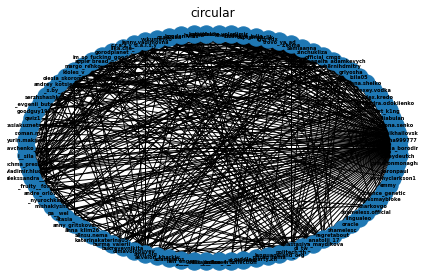

In [9]:
plt.plot()
plt.title('circular')
nx.draw_circular(G, with_labels=True, font_weight='bold', font_size=5)

plt.tight_layout()
plt.show()

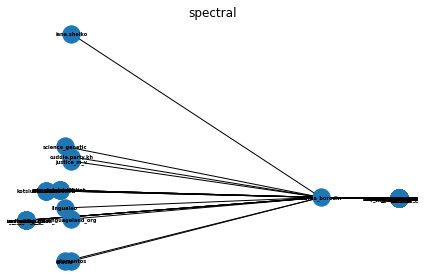

In [11]:
plt.plot()
plt.title('spectral')
nx.draw_spectral(G, with_labels=True, font_weight='bold', font_size=5)
    
plt.tight_layout()
plt.show()

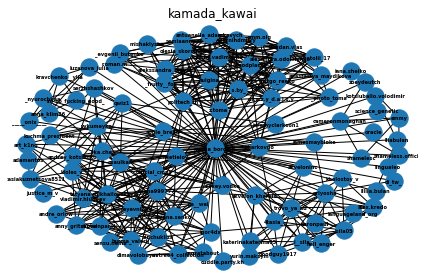

In [12]:
plt.plot()
plt.title('kamada_kawai')
nx.draw_kamada_kawai(G, with_labels=True, font_weight='bold', font_size=5)

plt.tight_layout()
plt.show()